Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 4 </h2>
    <h1>   </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2022<br>    
        Fecha de entrega: Viernes 4 de noviembre 23.59 horas
    </p>
    <br>
</center>

<br>

---

# Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

# Librerías aceptadas:
- `Numpy`
- `Pandas`
- Cualquier librería para graficar

Clases y funciones aceptadas de la librería `sklearn`:
- `train_test_split` y `StratifiedKFold` del módulo `model_selection`
- `PCA` del módulo `decomposition`
- `MLPClassifier` del módulo `neural_network`
- Toda funcíon del módulo `metrics`
- Clasificadores varios (solo para la parte del bonus)

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

# Introducción
<p align="center">
  <img src="https://play-lh.googleusercontent.com/E_kpq1HGn5WU2P4S2yu0BwrPEHqiA-VBh2R7qoIjPFXdNvKA0A-8zi0RzRslUtEOnUvA" width="200"/>
</p><br>

Un equipo de desarrolladores se encuentra creado una aplicación que sea capaz de resolver problemas de matemáticas tan solo escaneando el ejercicio. Sin embargo, se han encontrado con un obstaculo: Ninguno de ellos sabe como hacer que la aplicación reconozca los caracteres de las fotografías. Es entonces cuando deciden contactarte a tí para que con tus avanzadas habilidades en *Machine Learning* puedas ayudarles con su problema.

Tu trabajo en este equipo será construir un MLP (*Multi-Layer Perceptron*) que, dada una foto de un dígito, sea capaz de predecir a cual clase corresponde (i.e. cual es el dígito de la foto). El equipo te ha proporcionado un [dataset](https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv) con fotografias de números para que entrenes y pruebes tu red neuronal. Para probar la robustez de tu modelo, deberás someterlo a ciertos procedimientos que se especificarán más adelante.

# 0. Set Up

In [19]:
# Para importar más librerias, hazlo en esta sección
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sn

import time

In [2]:
# Puedes cambiar esto para leer los datos como más te acomode
df_main = pd.read_csv("digits.csv")

Cada imagen de un dígito corresponde a una matriz de 28x28 (784 pixeles). De esta manera:

- `X`: Matriz de 42000 x 784. Las filas corresponden a imágenes de dígitos y las columnas corresponden a los pixeles de dicha imagen (con valores desde el 0 al 256)
- `y`: *Ground truth* (42000 elementos). Indica la clase a la que pertenece la fila (i.e. el dígito de la foto. Va desde el 0 hasta el 9)

In [3]:
# Dejar esto como está
y = df_main["label"]
df_main.drop(columns=['label'], inplace=True)
X = df_main

# 1. Preguntas Teóricas (1 pt)

### ¿Como "aprende" un MLP?¿Cuales son algunos de los hiperparámetros que recibe?¿Que se obtiene como resultado de este entrenamiento?

**Respuesta:** 

Feedfoward
Backpropagation
Gradiente descendente

### Si bien los MLP pueden ser muy poderosos a la hora de clasificar, tienen un problema que puede ser no menor relacionado con la función que busca minimizar, ¿Cuál ese ese problema?¿Que soluciones se te ocurren para solucionarlo?
**Respuesta:** 

Random weight initialization
Feature scaling?


# 2. Pre-procesamiento de los datos (0.5 pt)

Divide el dataset original en *train* y *test*, dejando un 10% de los datos para este último. Asegurate de que las clases estén balanceadas en ambos conjuntos de datos. Puedes utilizar la función `train_test_split` de `sklearn.model_selection`

In [4]:
# Realiza aquí la separación balanceada en train y test
print("X:", X.shape, "y:",y.shape)


# Separamos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2433, stratify=y)
print("X_train:", X_train.shape, "y_train:",y_train.shape)

print("X_test:", X_test.shape, "y_test:",y_test.shape)

X: (42000, 784) y: (42000,)
X_train: (37800, 784) y_train: (37800,)
X_test: (4200, 784) y_test: (4200,)


Una vez tengas los conjuntos de *train* y *test* deberás generar dos datasets:
- *raw*: Los datos "crudos" sin mayor preprocesamiento.
- *PCA*: Sobre los datos crudos, aplicar un PCA reteniendo un 95% de la varianza.

Atención: Ten cuidado de hacer PCA solo y únicamente con los datos del training, ya que ambos sets deben funcionar de forma independiente (Piensa que a priori "no sabemos nada" de los datos de testing, por lo que no deben influir en el entrenamiento). Para la retención de la varianza podría serte util el atributo de `explained_variance_ratio_` de [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Una vez se haya hecho fit del set de *train*, tranforma también los datos de *test*

In [5]:
X_train_raw = X_train
X_test_raw = X_test

x = 154
var = 0
while var < 0.95:
    pca = PCA(n_components=x, random_state= 2433)
    pca.fit(X_train)
    var = pca.explained_variance_ratio_.sum()
    print(var)
    x += 1

0.9501370681838223


In [6]:
print(x)

155


El número de componentes que mantiene un 95% de varianza es 155.

In [7]:
pca = PCA(n_components=155, random_state= 2433)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. Multi-Layer Perceptron (2 pts)

Olvidemos el set de *test* por un rato, ya que lo usaremos más adelante para probar el funcionamiento de nuestro clasificador con datos que nunca ha visto. 

En esta parte de la tarea deberás usar la implementación del [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) de Sklearn para realiza una busqueda de hiperparámetros en ambos set de *train* (*raw* y *PCA*). Algunos de los que puedes cambiar son:
- `hidden_layer_sizes`: Cantidad de capas de la red y cuantas neuronas tiene cada una (por ejemplo la tupla `(20, 8)` indica dos capas, la primera de 20 nodos y la segunda de 8 nodos)
- `activation`: Función de activación
- `max_iter`: Cantidad máxima de iteraciones que puede hacer la red
- y cualquier otro que estimes conveniente

Si quieres cambiar alguno de los parámetros que no se han visto en clases no olvides mencionarlo y explicar brevemente en que consiste. Las únicas restricciones a la hora de probar hiperparámetros son que el entrenamiento se haga con el set de *train* y que se deben usar al menos 3 capas ocultas.

Para validar la elección de hiperparámetros, deberas hacer un *cross-validation* con 5 folds (para ambos dataset). Para cada una de las folds, deberás obtener la matriz de confusión (presta atención a los errores más comunes) y el accuracy $\eta$. El accuracy final de la elección de hiperparámetros será el promedio de las 5 folds.

En resumen, se debe hacer lo siguiente:
- Proponer combinaciones de hiperparámetros
- Para cada combinación, hacer cross-validation con 5-folds
- Obtener la matriz de confusión y el accuracy de cada fold
- Obtener el accuracy del MLP con esa configuración

\* *Podría serte útil la función [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)*

\** *Quizás para más adelante te interese medir el tiempo de entrenamiento de ambos dataset*

In [66]:
classifiers = []
activation = ["logistic", "tanh", "relu"]
hidden_layer = [(10, 10, 10), (25, 25, 25), (5, 5, 5, 5)]
max_iter = [150, 200, 500]
learning_rate_i = [0.0001, 0.001, 0.01]
for act in activation:
    for hl in hidden_layer:
        for iter in max_iter:
            for lr in learning_rate_i:
                model = MLPClassifier(activation=act, hidden_layer_sizes=hl, max_iter=iter, learning_rate_init=lr, random_state=2433)
                classifiers.append([model, [act, hl, iter, lr]])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state= 2433)

Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test
Accuracy: 0.877%
Accuracy: 0.883%
Accuracy: 0.886%
Accuracy: 0.883%
Accuracy: 0.874%
Accuracy total del fold con la configuración ['logistic', (10, 10, 10), 100]: 88.069%


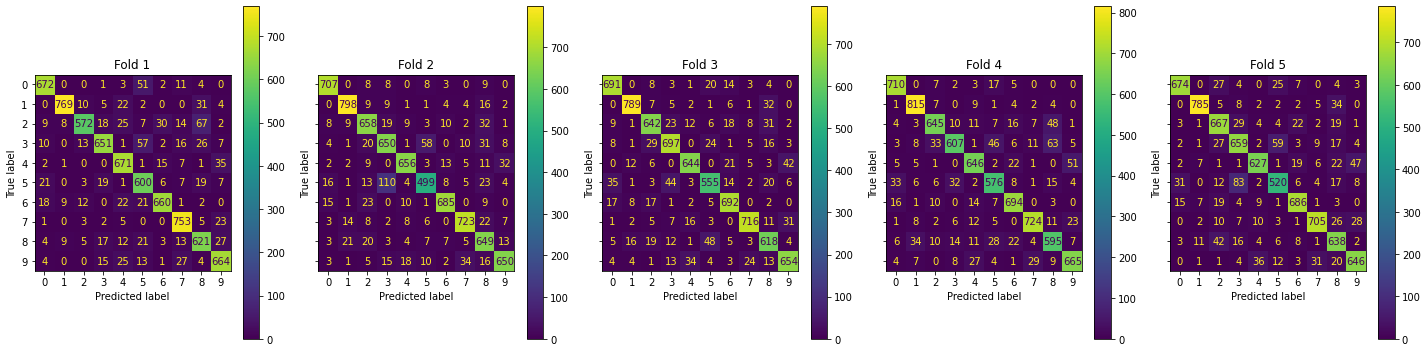

Test
Test
Test
Test
Test
Accuracy: 0.769%
Accuracy: 0.738%
Accuracy: 0.767%
Accuracy: 0.794%
Accuracy: 0.747%
Accuracy total del fold con la configuración ['logistic', (10, 10, 10), 100]: 76.304%


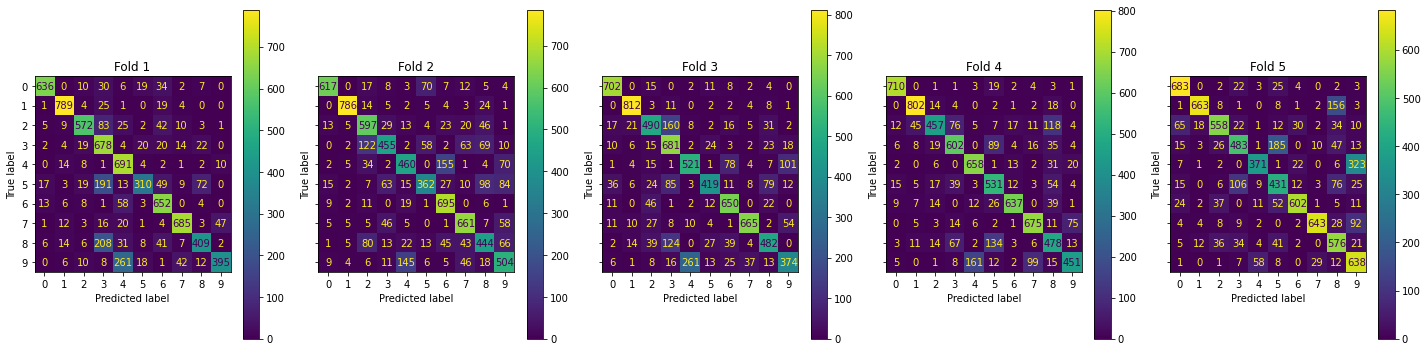

C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test


C:\Users\ignac\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test
Accuracy: 0.687%
Accuracy: 0.636%
Accuracy: 0.581%
Accuracy: 0.568%
Accuracy: 0.643%
Accuracy total del fold con la configuración ['logistic', (10, 10, 10), 200]: 62.315%


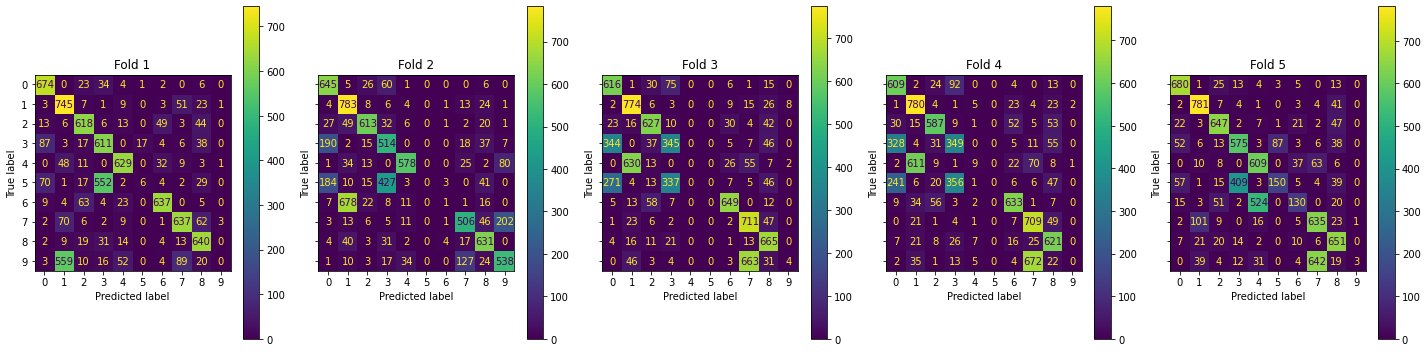

Test
Test
Test
Test
Test
Accuracy: 0.877%
Accuracy: 0.888%
Accuracy: 0.883%
Accuracy: 0.892%
Accuracy: 0.89%
Accuracy total del fold con la configuración ['logistic', (10, 10, 10), 200]: 88.603%


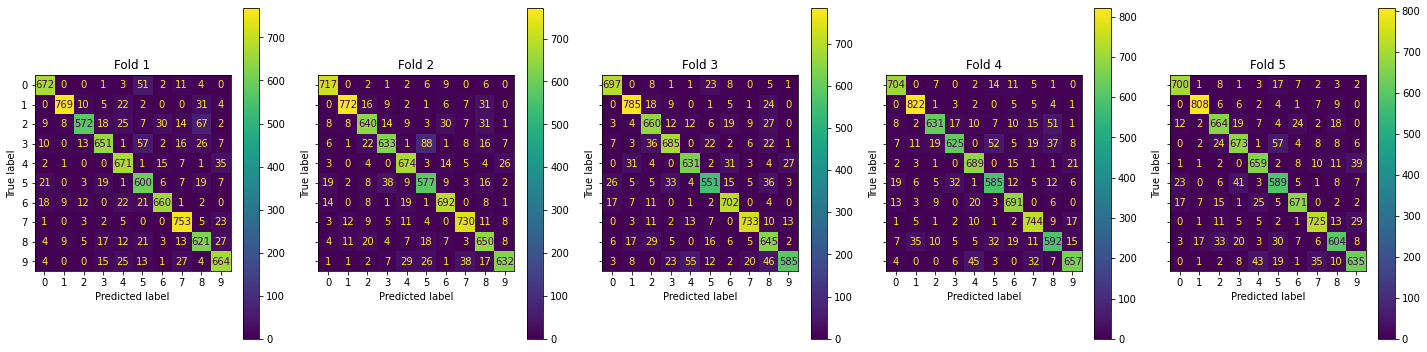

In [65]:
tiempos_raw = []
for model, params in classifiers[1:5]:
    accuracy_scores = []
    cms = []
    for train_index, test_index in skf.split(X_train_raw, y_train):
        x_train_fold, x_test_fold = X_train_raw.iloc[train_index], X_train_raw.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        model.fit(x_train_fold, y_train_fold)
        y_pred = model.predict(x_test_fold)
        ac = accuracy_score(y_test_fold, y_pred)
        cm = confusion_matrix(y_test_fold, y_pred)
        accuracy_scores.append(ac)
        cms.append(cm)
        print("Test")
    for ac in accuracy_scores:
        print(f"Accuracy: {round(ac,3)}%")

    print(f"Accuracy total del fold con la configuración {params}: {round(sum(accuracy_scores)/len(accuracy_scores)*100,3)}%")
    f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
    n = 1
    for cm, i in zip(cms, axes):
        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
        cm_display.plot(ax=i)
        cm_display.ax_.set_title(f"Fold {n}")
        n += 1
        
    plt.tight_layout()
    plt.show()

In [59]:
for ac in accuracy_scores:
    print(f"Accuracy: {round(ac,3)}%")

print(f"Accuracy total del fold con la configuración {params}: {round(sum(accuracy_scores)/len(accuracy_scores)*100,3)}%")

Accuracy: 0.94%
Accuracy: 0.913%
Accuracy: 0.932%
Accuracy: 0.906%
Accuracy: 0.925%
Accuracy total del fold con la configuración ['relu', (50, 50, 50, 50), 600]: 92.323%


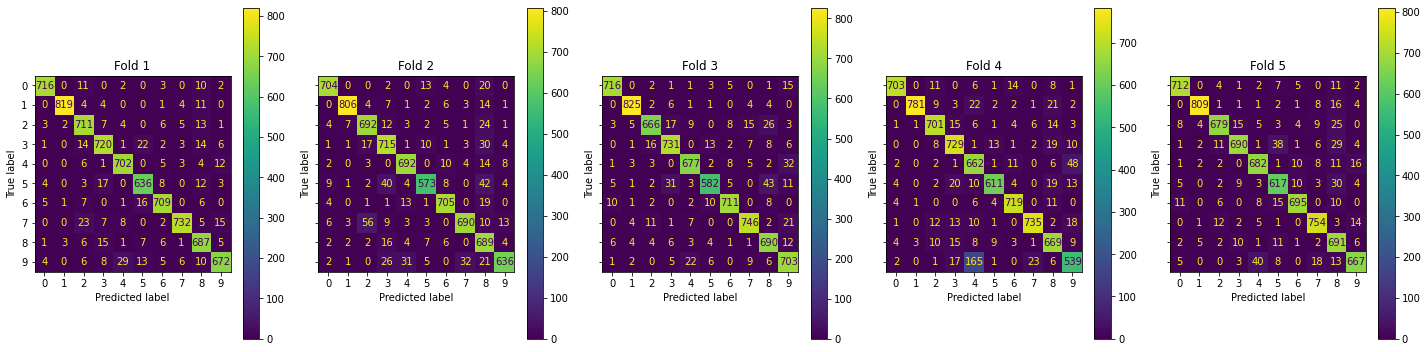

In [38]:
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
n = 1
for cm, i in zip(cms, axes):
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot(ax=i)
    cm_display.ax_.set_title(f"Fold {n}")
    n += 1
    
plt.tight_layout()
plt.show()

In [12]:
# for model, params in classifiers:
#     for train_index, test_index in skf.split(X_train_pca, y_train):
#         x_train_fold, x_test_fold = X_train_pca[train_index], X_train_pca[test_index]
#         y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

# 4. Testing y Análisis de Resultados (1.5 pts)

Traigamos de vuelta los sets de test.

Predice en tu mejor red neural las clases de los sets de *test* (*Raw* y *PCA*). La mejor red neuronal para cada dataset será aquel que de un mayor accuracy. Una vez entrenada, obten las siguientes métricas
- Matriz de confusión
- Accuracy
- Sensibilidad y Especificidad

Visualiza la matriz de confusión, ¿Cuáles son los errores más frecuentes?

In [13]:
7

7

Además, para cada una de las 10 clases crea una visualización que ilustre los casos borde de la clasificación utilizando el método [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba). Los casos borde son de dos tipos: 
- **I)** Cuando la clase es asignada correctamente, a pesar de que había alta probabilida de clasificar mal. (ej.: Un 3 se clasifica como un 3, pero había alta probabilidad de clasificar con un 8)

- **II)** Cuando no se asigna la clase en cuestión, pero de forma correcta. Aun así, había alta probabilidad de clasificar con la clase en estudio (e.: Un 7 no se clasifica como un 3, pero había alta probabilidad de sí hacerlo).

Para el primer caso analiza cuales eran las otras clasificaciones más probables (se recomienda histograma apilado), y para el segundo indica cual era la probabilidad de clasificar mal (se recomienda histograma)

\* *Puedes elegir libremente que se considera como "alta probabilidad"*

# 5. Preguntas Finales (1 pt)


### ¿Cuales fueron los errores más recurrentes de la red neuronal?¿A que creés que se debe?

**Respuesta:**

### ¿Notas alguna diferencia entre las ejecuciones de los dataset *Raw* y *PCA*?¿Cuales son?

**Respuesta:**

### ¿Se ven indicios de *over-fitting*?

**Respuesta:**

# ⭐ Bonus
Esta tarea cuenta con un bonus al que podrás optar. Cabe recalcar que para optar a este beneficio la nota de tu tarea (sin bonus) debe ser igual o superior a 3,95 (sin considerar posibles descuentos).

## Otros clasificadores (5 décimas)
Realiza un procedimiento similar al que hiciste en esta tarea con otro clasificador y explica como funciona. Este procedimiento será un poco más simplificado:
- No es necesario responder preguntas teóricas
- Trabaja únicamente con un dataset. Puedes hacer reducción de dimensionalidad si lo deseas
- El set de train debe ser un 10% de los datos originales. Se debe hacer cross-validation con 5 folds. No es necesario obtener métricas de cada fold, basta con obtener el accuracy final del clasificador
- Elige la mejor combinación de hiperparámetros, evalua el set de test, obtén la matriz de confusión y accuracy ¿Cual clasificador tuvo mejores resultados?¿MLP o este?